## Extra information

**Thumbnail:**

Thumbnail resizing maintains the aspect ratio of an image by adjusting either the width or the height of the image while keeping the other dimension proportional. Here's how it works:

Determine the Scaling Factor: When you specify the target dimensions (e.g., (WIDTH, HEIGHT)), thumbnail resizing calculates the scaling factor separately for the width and height. The scaling factor is the ratio between the target dimension and the corresponding dimension of the original image.

For the width: scaling_factor_width = WIDTH / original_width
For the height: scaling_factor_height = HEIGHT / original_height
Choose the Smaller Scaling Factor: Thumbnail resizing chooses the smaller of the two scaling factors. This ensures that the image fits entirely within the specified bounding box (defined by WIDTH and HEIGHT) without exceeding it in either dimension.

Apply the Scaling Factor: The chosen scaling factor is then applied to both the width and height of the original image, resulting in a resized image. Importantly, since the same scaling factor is used for both dimensions, the aspect ratio of the original image is preserved. The image is either scaled down proportionally to fit within the bounding box or, if it's smaller than the bounding box, it's left unchanged.

**optimizers:**

optimizer called RMSprop for training a neural network.
clipvalue = 1.0: The clipvalue parameter is used for gradient clipping. Gradient clipping is a technique to prevent exploding gradients during training, which can occur in deep neural networks. When gradients become too large, they can lead to numerical instability. By setting clipvalue, you limit the magnitude of gradients to be no larger than the specified value (in this case, 1.0). This prevents gradient values from becoming extremely large and potentially causing training issues.

decay = 1e-8: The decay parameter introduces a small value to the learning rate at each training step. This is a form of learning rate decay. A small decay value like 1e-8 gradually reduces the learning rate over time, which can help the optimizer to converge to a good solution more efficiently, especially in later stages of training. It's a technique commonly used to fine-tune the training process.

RMSprop (Root Mean Square Propagation) and Adam (Adaptive Moment Estimation) are both popular optimization algorithms used for training neural networks. While they share some similarities, they also have key differences:

Update Rule:

RMSprop: RMSprop adapts the learning rates for each parameter individually. It does this by maintaining a moving average of the squared gradient for each parameter and dividing the current gradient by the square root of this moving average before updating the parameter. This helps to scale the learning rates based on the magnitude of recent gradients.

Adam: Adam also adapts the learning rates for each parameter individually. It combines elements of both RMSprop and momentum. It maintains moving averages of both the first-order gradient (like RMSprop) and the second-order gradient (like momentum with RMSprop). Adam then uses these moving averages to update the parameters.

Momentum:

RMSprop: RMSprop does not have explicit momentum like Adam. It only considers the current gradient and the exponentially moving average of squared gradients.

Adam: Adam incorporates momentum by maintaining an exponentially moving average of past gradients, similar to the classic momentum optimizer. This helps smooth out the gradient updates and can lead to faster convergence.

Bias Correction:RMSprop: RMSprop does not typically use bias correction, which means it may have issues with biased updates, especially when gradients are small.

Adam: Adam incorporates bias correction for the moving averages, which helps to compensate for the fact that the moving averages are initialized with zeros.

**Hyperparameters:**

RMSprop: It has fewer hyperparameters to tune. Typically, you need to set the learning rate and the gradient clipping value (if desired).

Adam: Adam has more hyperparameters, including the learning rate, decay rates for the moving averages, and epsilon (a small constant to prevent division by zero).

**Performance:**
The performance of RMSprop and Adam can vary depending on the specific problem, architecture, and dataset. In practice, there is no one-size-fits-all answer, and it often requires experimentation to determine which optimizer works best for a given task.

**TRAIN GENERATOR AND DISCRIMINATOR:**

In a Generative Adversarial Network (GAN), you typically do not compile the generator model in the same way as you do with a discriminative model (e.g., a classifier or regression model). This is because the training process of a GAN involves a unique dynamic between two neural networks: the generator and the discriminator.

**Here's why you don't compile the generator model in a GAN:**

GAN Objective Function: In a GAN, the training process is driven by a minimax game between the generator and the discriminator. The generator aims to produce realistic data that can fool the discriminator, while the discriminator aims to distinguish between real and generated data. This adversarial objective does not lend itself to traditional loss functions that you would compile a model with, like mean squared error or cross-entropy.

Loss Calculation: The loss for a GAN is calculated based on the output of the discriminator. During training, the generator is updated to minimize the loss incurred when the discriminator correctly classifies its generated data as fake. This loss is not a straightforward, pre-defined function like it is in supervised learning; it depends on the discriminator's performance, which is updated simultaneously with the generator.

Training Loop: Training a GAN typically involves alternating between updating the discriminator and the generator in a loop. This is done iteratively, with the generator trying to improve and generate more realistic data to fool the discriminator, while the discriminator gets better at distinguishing between real and fake data. Compiling the generator as you would a standalone model would not fit this dynamic.

In summary, in GANs, the generator is not trained using a conventional compile-and-fit approach. Instead, the generator and discriminator networks are trained in tandem within a custom training loop, where the loss is dynamically calculated based on the discriminator's performance. This unique training procedure is essential for GANs to learn to generate realistic data effectively.

**why here is beter to use RMSPROP than ADAM:**

GANs try to replicate a probability distribution. Therefore, we should use loss functions that reflect the distance between the distribution of the data generated by the GAN and the distribution of the real data.

**Three losses:**

Rather than just having a single loss function, we need to define three: The loss of the generator, the loss of the discriminator when using real images and the loss of the discriminator when using fake images. The sum of the fake image and real image loss is the overall discriminator loss.



**control_vectors** = np.random.normal(size=(CONTROL_SIZE_SQRT**2, LATENT_DIM)) / 2 is a common practice in some GAN implementations to control the magnitude of the initial values of the control vectors. This scaling serves several purposes:

**Controlled Initialization**: By dividing the values by 2, you are essentially scaling down the initial values of the control vectors. Smaller initial values can help in controlling the initial behavior of the generator. It's often used to prevent the generator from starting with excessively large or small values that could lead to unstable training dynamics.

**Normalization**: It can help in ensuring that the initial control vectors have a similar scale. Neural networks, including GANs, often perform better when input data or weights are within a reasonable range. Normalized inputs can help in achieving more stable training.

**Experimentation and Tuning**: Scaling the initial values of control vectors is sometimes done as part of hyperparameter tuning. Different scaling factors can affect the training behavior and convergence of the GAN, and practitioners often experiment with different scaling values to find what works best for their specific problem.

## Code part

In [ ]:
from IPython.display import clear_output
!pip install --upgrade kaggle clear_output()
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
   print('User uploaded file "{name}" with length {length} bytes'.format( name=fn, length=len(uploaded[fn])))
   !mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `pip install --upgrade kaggle clear_output()'


Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 72 bytes


In [ ]:
!kaggle datasets download -d jessicali9530/celeba-dataset

 99% 1.32G/1.33G [00:12<00:00, 191MB/s]
100% 1.33G/1.33G [00:12<00:00, 116MB/s]


In [ ]:
!unzip -qx /content/celeba-dataset.zip

In [ ]:
!pip install Pillow

In [ ]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import tensorflow as tf
import time

In [ ]:
path = '/content/img_align_celeba/img_align_celeba'

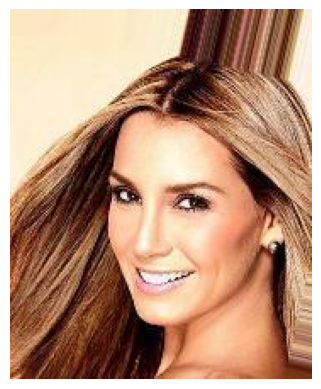

Image size: 178 x 218 pixels


In [ ]:
image_path = os.path.join(path,'000001.jpg')
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Turn off axis labels and ticks (optional)
plt.show()

# Get the dimensions (size) of the image
height, width, _ = img.shape

# Display the dimensions
print(f"Image size: {width} x {height} pixels")

In [ ]:
IMAGES_COUNT = 10000
#original width and height of images
ORIG_WIDTH = 178
ORIG_HEIGHT = 208
# different of width and width divided by two since we what to make square
diff = (ORIG_HEIGHT - ORIG_WIDTH) // 2
WIDTH = 128
HEIGHT = 128
#this is show the top-left part of the final image (0,diff) and bottom-right (orig_width, ORIG_HEIGHT - diff), this will make (ORIG_WIDTH,ORIG_WIDTH) images
crop_rect = (0, diff, ORIG_WIDTH, ORIG_HEIGHT - diff)
images = []
for pic_file in tqdm(os.listdir(path)[:IMAGES_COUNT]):
    # croping the image use crop_rect above
    pic =  Image.open(os.path.join(path,pic_file)).crop(crop_rect)
    # thumbnail used to resize the image to fit within a specified bounding box while maintaining its aspect ratio.
    # Image.ANTIALIAS is a high-quality resampling filter that is well-suited for downscaling images.
    pic.thumbnail((WIDTH, HEIGHT), Image.ANTIALIAS)
    images.append(np.uint8(pic)) #Normalize the images, This data type is often used for representing pixel values in images, where each pixel's value can range from 0 to 255.
images = np.array(images) / 255

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-8-d34c4cf0665d>:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  pic.thumbnail((WIDTH, HEIGHT), Image.ANTIALIAS)
100%|██████████| 10000/10000 [00:23<00:00, 422.74it/s]


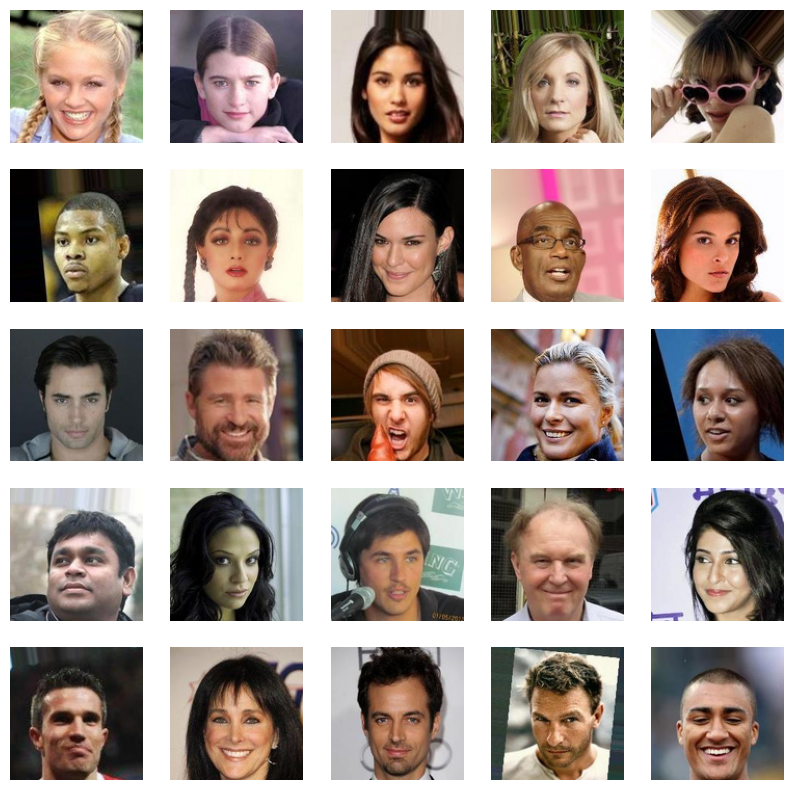

In [ ]:
images.shape #print first 25 images
plt.figure(1, figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()

In [ ]:
HEIGHT =128
WIDTH = 128
CHANNELS = 3
LATENT_DIM = 32
EPOCHS = 20000
BATCH_SIZE = 16
# diractory for saving weight model and generated images
GENERATED_DIR = 'generated'
# template of how save the image and where to save
FILE_PATH = '%s/generated_%d.png'
#control the size of a grid of images that will be generated and saved for visualization purposes during the training of a (GAN)
CONTROL_SIZE_SQRT = 6

In [ ]:
def Generator_model():
   gen_input = tf.keras.layers.Input(shape=(LATENT_DIM,))
   x = tf.keras.layers.Dense(128 * 16 * 16)(gen_input)
   x = tf.keras.layers.LeakyReLU(alpha=0.02)(x)
   x = tf.keras.layers.Reshape((16,16,128))(x)

   # increase the number of channels but save the width and hight of 16
   x = tf.keras.layers.Conv2D(filters = 256 , kernel_size = 5, padding = 'same')(x)
   x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)

   # resolution 32
   x = tf.keras.layers.Conv2DTranspose(filters = 256, kernel_size = (4,4) , strides=(2,2), padding = 'same')(x)
   x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)

   # resolution 64
   x = tf.keras.layers.Conv2DTranspose(filters = 256,  kernel_size = (4,4) , strides=(2,2), padding = 'same')(x)
   x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)

   # resolution 128
   x = tf.keras.layers.Conv2DTranspose(filters = 256,  kernel_size = (4,4) , strides=(2,2), padding = 'same')(x)
   x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)


   x = tf.keras.layers.Conv2D(512, 5, padding='same')(x)
   x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)
   x = tf.keras.layers.Conv2D(512, 5, padding='same')(x)
   x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)

   x = tf.keras.layers.Conv2D(filters = CHANNELS , kernel_size = 7 , padding = 'same',activation='sigmoid')(x)


   model = tf.keras.models.Model(gen_input,x)
   return model

In [ ]:
def discriminator_model():
   disc_input = tf.keras.layers.Input(shape=(HEIGHT,WIDTH,CHANNELS))

   x = tf.keras.layers.Conv2D(filters = 128,  kernel_size = (3,3))(disc_input)
   x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)

   x = tf.keras.layers.Conv2D(filters = 256,  kernel_size = (4,4) , strides=(2,2))(x)
   x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)

   x = tf.keras.layers.Conv2D(filters = 256,  kernel_size = (4,4) , strides=(2,2))(x)
   x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)

   x = tf.keras.layers.Conv2D(filters = 256,  kernel_size = (4,4) , strides=(2,2))(x)
   x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)

   x = tf.keras.layers.Conv2D(filters = 256,  kernel_size = (4,4) , strides=(2,2))(x)
   x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)

   x = tf.keras.layers.Flatten()(x)
   x = tf.keras.layers.Dropout(0.4)(x)

   x = tf.keras.layers.Dense(128, activation='LeakyReLU')(x)
   x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

   #It uses a relatively small learning rate (lr) to ensure stable convergence.
   #It applies gradient clipping with a limit (clipvalue) to prevent gradient explosions.
   optimizer = tf.keras.optimizers.RMSprop(learning_rate=.0001,clipvalue=1.0)
   model =  tf.keras.models.Model(disc_input,x)
   model.compile(optimizer= optimizer , loss = 'binary_crossentropy')
   return model

In [ ]:
DiscriminatorModel = discriminator_model()
GeneratorModel = Generator_model()
# during the gan model  want to train generator unable layers discriminator to train to prevent learning the fake models patters
DiscriminatorModel.trainable = False
gan_input = tf.keras.layers.Input(shape=(LATENT_DIM, ))
gan_output = DiscriminatorModel(GeneratorModel(gan_input))
Gan_model = tf.keras.models.Model(gan_input, gan_output)#Adversarial Model
optimizer = tf.keras.optimizers.RMSprop(learning_rate=.0001, clipvalue=1.0)
Gan_model.compile(optimizer=optimizer, loss='binary_crossentropy')


In [ ]:
if not os.path.isdir(GENERATED_DIR):
    os.mkdir(GENERATED_DIR)

#random vectors that are drawn from a normal distribution
# divided by two, control the magnitude of the initial values of the control vectors.
control_vectors = np.random.normal(size=(CONTROL_SIZE_SQRT**2, LATENT_DIM)) / 2
#lists used to store the discriminator and generator losses, respectively, during training.
d_losses, g_losses = [],[]
#keep track of where the training data batch starts within the dataset.
start = 0
#number of images saved for visualization.
images_saved = 0
for step in range(EPOCHS):
    start_time = time.time()
    latent_vectors = np.random.normal(size=(BATCH_SIZE, LATENT_DIM))
    generated = GeneratorModel.predict(latent_vectors)

    real = images[start:start + BATCH_SIZE]
    combined_images = np.concatenate([generated, real])
    # give genereted label one and reals label zero
    labels = np.concatenate([np.ones((BATCH_SIZE, 1)), np.zeros((BATCH_SIZE, 1))])
    #The purpose of adding small random values to the labels is to introduce some noise or uncertainty into the training process.
    #This can help prevent the discriminator from becoming too confident too quickly,
    labels += .05 * np.random.random(labels.shape)

    d_loss = DiscriminatorModel.train_on_batch(combined_images, labels)
    d_losses.append(d_loss)

    # we label it as real means zero here
    latent_vectors = np.random.normal(size=(BATCH_SIZE, LATENT_DIM))
    misleading_targets = np.zeros((BATCH_SIZE, 1))

    g_loss = Gan_model.train_on_batch(latent_vectors, misleading_targets)
    g_losses.append(g_loss)

    start += BATCH_SIZE
    if start > images.shape[0] - BATCH_SIZE:
        start = 0

    if step % 50 == 49:
        Gan_model.save_weights('gan.h5')

        print('%d/%d: d_loss: %.4f,  g_loss: %.4f.  (%.1f sec)' % (step + 1, EPOCHS , d_loss, g_loss, time.time() - start_time))

        control_image = np.zeros((WIDTH * CONTROL_SIZE_SQRT, HEIGHT * CONTROL_SIZE_SQRT, CHANNELS))
        control_generated = GeneratorModel.predict(control_vectors)
        for i in range(CONTROL_SIZE_SQRT ** 2):
            x_off = i % CONTROL_SIZE_SQRT
            y_off = i // CONTROL_SIZE_SQRT
            control_image[x_off * WIDTH:(x_off + 1) * WIDTH, y_off * HEIGHT:(y_off + 1) * HEIGHT, :] = control_generated[i, :, :, :]
        im = Image.fromarray(np.uint8(control_image * 255))
        im.save(FILE_PATH % (GENERATED_DIR, images_saved))
        images_saved += 1

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 24ms/step
2200/20000: d_loss: 0.6470,  g_loss: 0.7168.  (1.9 sec)
1/1 [==============================] - 0s 25ms/step
2250/20000: d_loss: 0.5617,  g_loss: 1.1081.  (1.9 sec)
1/1 [==============================] - 0s 40ms/step
2300/20000: d_loss: 0.6465,  g_loss: 0.9892.  (2.4 sec)
1/1 [==============================] - 0s 20ms/step
2350/20000: d_loss: 0.5228,  g_loss: 1.7461.  (1.9 sec)
1/1 [==============================] - 0s 30ms/step
2400/20000: d_loss: 0.5948,  g_loss: 2.3449.  (2.0 sec)
1/1 [==============================] - 0s 20ms/step
2450/20000: d_loss: 0.6405,  g_loss: 1.0944.  (2.0 sec)
1/1 [==============================] - 0s 28ms/step
2500/20000: d_loss: 0.5413,  g_loss: 1.0639.  (2.3 sec)
1/1 [==============================] - 0s 26ms/step
2550/20000: d_loss: 0.6129,  g_loss: 0.9014.  (1.9 sec)
1/1 [==============================] - 0s 21ms/step
2600/20000: d_loss: 0.5607,  g_lo

In [ ]:
import imageio
import shutil
images_to_gif = []
for filename in os.listdir(GENERATED_DIR):
    images_to_gif.append(imageio.imread(GENERATED_DIR + '/' + filename))
imageio.mimsave('trainnig_visual.gif', images_to_gif)
shutil.rmtree(GENERATED_DIR)